In [28]:
import pandas as pd
import numpy as np
import json
import gmaps
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import requests
from scipy.stats import linregress
import matplotlib.cm as cm
from scipy.stats import norm
import statistics

#from census import Census

import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [29]:
path = "CSV statistics/WR_2020.csv"
wr2020 = pd.read_csv(path)
wr2020['YDS'] = wr2020['YDS'].str.replace(',', '').astype(float)
wr2020.describe()

,Rank,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS/G
count,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.0,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000
mean,234.500000,14.510684,22.179487,182.491453,5.706410,17.638889,0.0,1.143162,0.978632,5.211538,0.034188,0.128205,5.743590,33.117521,2.551923
std,135.244224,25.181268,37.488297,320.078145,6.616471,23.311776,0.0,2.430802,4.093601,20.273613,0.233459,0.398895,6.468377,58.762711,4.120469
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-12.000000,0.000000,0.000000,0.000000,-2.000000,-0.800000
25%,117.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,234.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
75%,351.250000,19.250000,29.250000,221.000000,11.800000,34.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,13.000000,40.475000,3.800000
max,468.000000,127.000000,166.000000,1535.000000,22.000000,92.000000,0.0,18.000000,64.000000,232.000000,2.000000,3.000000,16.000000,300.900000,21.500000


In [30]:
mask = wr2020.REC > 40
wr2020 = wr2020[mask]
wr2020.dropna().reset_index(drop=True)
wr2020.describe()

,Rank,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS/G
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.0,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,35.194030,68.611940,103.014925,862.776119,12.698507,53.179104,0.0,5.626866,3.104478,17.253731,0.194030,0.388060,14.820896,157.834328,10.729851
std,21.444247,19.978743,26.029990,260.485027,2.236508,16.503375,0.0,3.428207,6.322481,37.281624,0.557016,0.576174,1.669017,49.955124,3.323061
min,1.000000,41.000000,59.000000,409.000000,7.600000,18.000000,0.0,0.000000,0.000000,-4.000000,0.000000,0.000000,8.000000,73.900000,5.300000
25%,17.500000,52.500000,81.000000,661.500000,11.100000,42.000000,0.0,3.000000,0.000000,0.000000,0.000000,0.000000,14.000000,122.000000,8.400000
50%,34.000000,63.000000,101.000000,840.000000,12.500000,51.000000,0.0,5.000000,1.000000,1.000000,0.000000,0.000000,15.000000,154.000000,10.800000
75%,50.500000,82.500000,121.500000,988.000000,14.250000,67.500000,0.0,7.000000,3.500000,15.000000,0.000000,1.000000,16.000000,187.700000,12.850000
max,87.000000,127.000000,166.000000,1535.000000,18.700000,92.000000,0.0,18.000000,41.000000,200.000000,2.000000,2.000000,16.000000,300.900000,21.500000


In [31]:
inputs = ['TGT']
feature = wr2020[inputs]
target = wr2020['YDS']

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    YDS   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     176.9
Date:                Thu, 05 Aug 2021   Prob (F-statistic):           3.23e-20
Time:                        21:49:51   Log-Likelihood:                -423.23
No. Observations:                  67   AIC:                             850.5
Df Residuals:                      65   BIC:                             854.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.8098     68.330     -0.275      0.784    -155.274     117.654
TGT            8.5578      0.643     13.301      0.000       7.273       9.843
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.154
Skew:                          -0.027   Prob(JB):                        0.926
Kurtosis:                       3.228   Cond. No.                         437.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<ipython-input-32-9823ddc924fe>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


Davante Adams (GB)
Tyreek Hill (KC)
Stefon Diggs (BUF)
Calvin Ridley (ATL)
DeAndre Hopkins (ARI)
Justin Jefferson (MIN)
D.K. Metcalf (SEA)
Adam Thielen (MIN)
Tyler Lockett (SEA)
Mike Evans (TB)
A.J. Brown (TEN)
Allen Robinson II (CHI)
Robert Woods (LAR)
Keenan Allen (LAC)
Brandin Cooks (HOU)
Amari Cooper (DAL)
Marvin Jones Jr. (JAC)
JuJu Smith-Schuster (PIT)
Chase Claypool (PIT)
CeeDee Lamb (DAL)
Terry McLaurin (WAS)
D.J. Moore (CAR)
Diontae Johnson (PIT)
Robby Anderson (CAR)
Curtis Samuel (WAS)
Cole Beasley (BUF)
Cooper Kupp (LAR)
Will Fuller V (MIA)
Nelson Agholor (NE)
Tee Higgins (CIN)
Corey Davis (NYJ)
Chris Godwin (TB)
Brandon Aiyuk (SF)
Marquise Brown (BAL)
Tyler Boyd (CIN)
Jarvis Landry (CLE)
Russell Gage (ATL)
Michael Gallup (DAL)
Jamison Crowder (NYJ)
T.Y. Hilton (IND)
Tim Patrick (DEN)
DeVante Parker (MIA)
Emmanuel Sanders (BUF)
Jerry Jeudy (DEN)
Mike Williams (LAC)
Sterling Shepard (NYG)
Laviska Shenault Jr. (JAC)
Keelan Cole Sr. (NYJ)
D.J. Chark Jr. (JAC)
Christian Kirk (AR

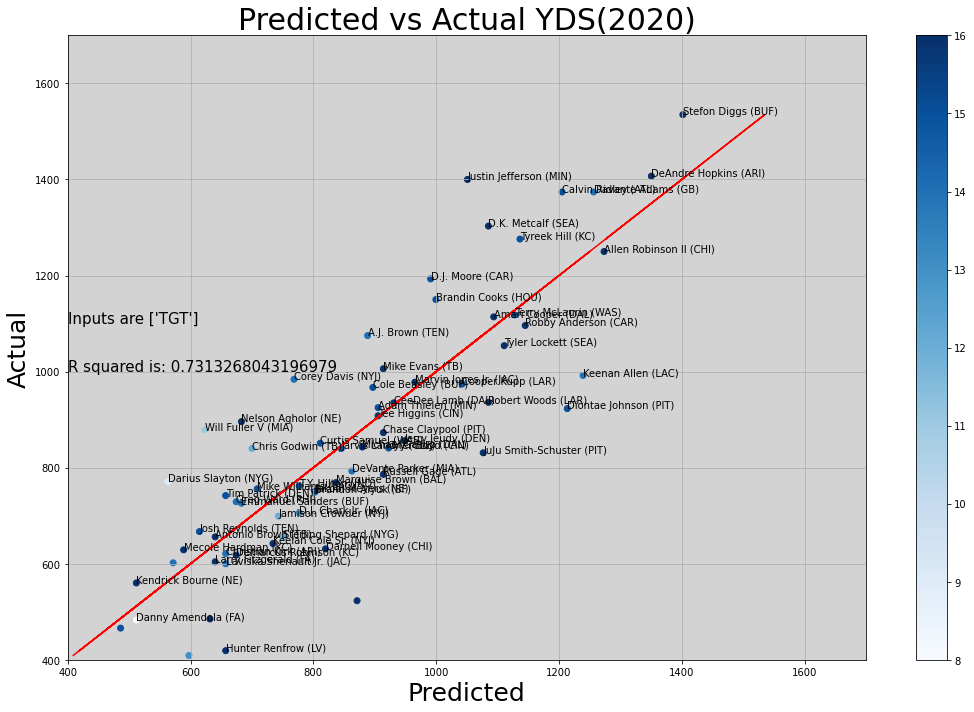

In [32]:
plt.figure(figsize=(15,10))
weight = wr2020.G
plt.scatter(results.fittedvalues, wr2020.YDS,marker="o",c= weight,cmap='Blues')

plt.xlim(400,1700)
plt.ylim(400,1700)
plt.xlabel("Predicted",fontsize=25)
plt.ylabel("Actual",fontsize=25)
plt.title("Predicted vs Actual YDS(2020)",fontsize=30)
plt.plot(wr2020.YDS, wr2020.YDS,color='red')
plt.tight_layout()
plt.annotate(f'R squared is: {results.rsquared}',(400,1000),fontsize=15)
plt.annotate(f'Inputs are {inputs}',(400,1100),fontsize=15)

plt.grid()
plt.colorbar()
ax = plt.axes()
ax.set(facecolor='lightgray')

n = wr2020.Player

for i,txt in enumerate(n):
    try:
        print(wr2020.Player[i])
        plt.annotate(txt, (results.fittedvalues[i], wr2020.YDS[i]))
    except:
        print(f'Player #{i} was not added')

plt.tight_layout()
plt.show()

In [33]:
predicted = results.fittedvalues
actual = wr2020.YDS
name = wr2020.Player
games = wr2020.G
difference  = wr2020.YDS - results.fittedvalues
wrDict = {'Name':name,'Games':games,'Predicted':predicted,'Actual':actual,'Difference':difference}
predDf = pd.DataFrame(wrDict)
pd.set_option('max_rows', None)

predDf.sort_values('Difference',ascending=False)

,Name,Games,Predicted,Actual,Difference
5,Justin Jefferson (MIN),16.0,1050.921020,1400.0,349.078980
27,Will Fuller V (MIA),11.0,623.028680,879.0,255.971320
6,D.K. Metcalf (SEA),16.0,1085.152407,1303.0,217.847593
30,Corey Davis (NYJ),14.0,768.512075,984.0,215.487925
28,Nelson Agholor (NE),16.0,682.933607,896.0,213.066393
52,Julio Jones (TEN),9.0,563.123752,771.0,207.876248
21,D.J. Moore (CAR),15.0,991.016093,1193.0,201.983907
10,A.J. Brown (TEN),14.0,888.321931,1075.0,186.678069
3,Calvin Ridley (ATL),15.0,1204.962263,1374.0,169.037737
14,Brandin Cooks (HOU),15.0,999.573939,1150.0,150.426061
